# DFU Thermogram Classification Using GLCM
1. Patched Based Classification
2. 

In [5]:
import os
import random

ds_path = f"{os.curdir}/ds/dfu_thermo_ds/"
import os
ds_instances = os.listdir(ds_path)

In [6]:
ds_instances = [ f"{ds_path}{x}" for x in ds_instances if x.endswith("png")]
random.shuffle(ds_instances)

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

imgs = [ (x.split("/")[-1], Image.open(x)) for x in random.sample(ds_instances, 2) ]

/home/someone/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


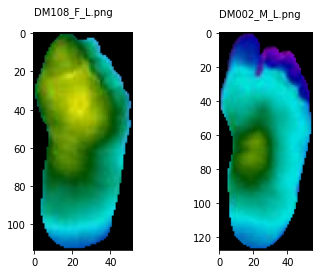

In [8]:
fig, ax = plt.subplots(1, 2)
for i, x in enumerate(imgs):
    ax[i].imshow(x[1])
    ax[i].text(0,-10, x[0])

# Feature Extraction From Each Instance


In [9]:
from skimage.feature import graycoprops, graycomatrix
import  numpy as np


distances = [1, 2, 3]
angles = [0, 45, 90, 135]
patch_id = 0
def glcm_feat(img, patch_id, distances, angles):
    glcm = graycomatrix(img, distances=distances, angles=angles, levels=256)

    props_n = ["contrast", "dissimilarity", "homogeneity", "ASM", "energy", "correlation"]
    props_d = {}
    
    for propn in props_n:
        prop = graycoprops(glcm, propn)
        for di, dist in enumerate(distances):
            for ai, ang in enumerate(angles):
                props_d[f"{propn}_{patch_id}_{dist}_{ang}"] = prop[di, ai]
    return props_d

55 141
0 (0, 0) (13, 35)
1 (13, 0) (26, 35)
2 (26, 0) (39, 35)
3 (39, 0) (52, 35)
4 (0, 35) (13, 70)
5 (13, 35) (26, 70)
6 (26, 35) (39, 70)
7 (39, 35) (52, 70)
8 (0, 70) (13, 105)
9 (13, 70) (26, 105)
10 (26, 70) (39, 105)
11 (39, 70) (52, 105)
12 (0, 105) (13, 140)
13 (13, 105) (26, 140)
14 (26, 105) (39, 140)
15 (39, 105) (52, 140)


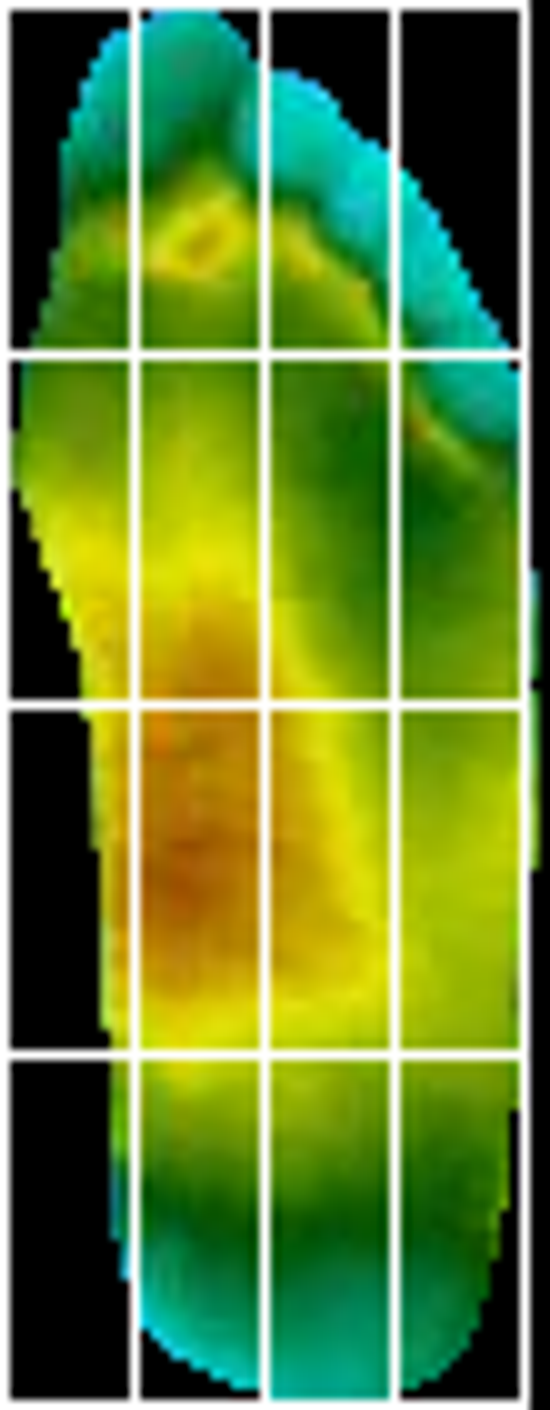

{'contrast_0_1_0': 731.9879120879187,
 'contrast_0_1_45': 797.4264214046722,
 'contrast_0_1_90': 367.0917874396121,
 'contrast_0_1_135': 731.9879120879145,
 'contrast_0_2_0': 1570.889714285738,
 'contrast_0_2_45': 930.9015837104173,
 'contrast_0_2_90': 1183.9773755656126,
 'contrast_0_2_135': 1570.889714285716,
 'contrast_0_3_0': 2400.6654761904683,
 'contrast_0_3_45': 1810.4758208955207,
 'contrast_0_3_90': 1507.3455797933382,
 'contrast_0_3_135': 2400.665476190472,
 'dissimilarity_0_1_0': 9.535164835164975,
 'dissimilarity_0_1_45': 12.425306577480452,
 'dissimilarity_0_1_90': 7.695115405260358,
 'dissimilarity_0_1_135': 9.535164835164876,
 'dissimilarity_0_2_0': 17.862285714285782,
 'dissimilarity_0_2_45': 16.60633484162917,
 'dissimilarity_0_2_90': 16.46040723981921,
 'dissimilarity_0_2_135': 17.862285714285715,
 'dissimilarity_0_3_0': 25.232142857142996,
 'dissimilarity_0_3_45': 26.15940298507462,
 'dissimilarity_0_3_90': 21.233065442020653,
 'dissimilarity_0_3_135': 25.23214285714

In [11]:
import math
from PIL import ImageDraw

def glcm_feat_patch(img, patch_count, distances=distances, angles=angles):
    powerof2 = lambda x : (math.log2(x) - int(math.log2(x))) == 0
    assert patch_count > 0 and powerof2(patch_count)
    width = img.width
    height = img.height

    x_stride = math.floor(width / patch_count)
    y_stride = math.floor(height / patch_count)

    x_points = [ x * x_stride for x in range(patch_count) ]
    y_points = [ x * y_stride for x in range(patch_count) ]
    
    
    feat = {}
    aimg = np.array(img)
    patch_id = 0
    for yp in y_points:
        for xp in x_points:
            patch = aimg[yp:(yp + y_stride), xp:(xp + x_stride)]
            feat1 = glcm_feat(patch, patch_id, distances, angles)
            patch_id += 1
            feat = { **feat, **feat1 }
            
    return feat
def show_patches(img, patch_count):
    rimg = img.convert("RGBA")

    powerof2 = lambda x : (math.log2(x) - int(math.log2(x))) == 0
    assert patch_count > 0 and powerof2(patch_count)
    width = rimg.width
    height = rimg.height
    print(width, height)
    
    x_stride = math.floor(width / patch_count)
    y_stride = math.floor(height / patch_count)
    
    
    x_points = [ x * x_stride for x in range(patch_count) ]
    y_points = [ x * y_stride for x in range(patch_count) ]

    
    canvas = ImageDraw.Draw(rimg, mode="RGBA")
    patch_id = 0
    # For 0
    
        
    
    for yp in y_points:
        for xp in x_points:
            width = x_stride
            height = y_stride
            p1 = (xp, yp)
            p3 = (xp + width, yp + height)
            print(patch_id, p1, p3)
            patch_id += 1
            
            canvas.rectangle((p1, p3), outline="white")
        
    display(rimg.resize(np.array(rimg.size) * 10))
img = Image.open(ds_instances[0])
show_patches(img, 4)
glcm_feat_patch(img.convert("L"), 2)

In [101]:
import pandas as pd
from collections import Counter
import traceback

def getHistogram(img):
    k = np.array(img).reshape(-1, ) 
    d = Counter(k)
    P = lambda x : d.get(x, 1/len(k)) / len(k)
    
    mean = np.sum([ g * P(g) for g in range(256) ])
    varr = np.sum([ (g - mean)**2 * P(g) for g in range(256) ])
    entropy = np.sum([ P(g) * math.log2(P(g)) for g in range(256) ])
    skew = np.sum([((1 / varr ** 3) * (( g - mean) ** 3) * P(g)) for g in range(256)])
    kurtosis = 0
    return {
        "mean" : mean,
        "varr" : varr,
        "entropy": entropy,
        "skew" : skew
    }

def imagetodf(image_paths, patches, distances, angles):
    df = {}
    for i, path in enumerate(image_paths):
        try:
            img = Image.open(path).convert("L")
            feats = glcm_feat_patch(img, patches, distances, angles)
            #feats = { **feats, **getHistogram(img) }
            feats["label"] =  1 if "DM" in path else 0 
            
            if len(df) > 0:
                for key in feats.keys():
                    df[key] += [ feats[key] ]
            else:
                for key in feats.keys():
                    df[key] = [ feats[key] ]
        except Exception as e:
            print(f"[ERROR]: {i}, {path}", e)
            print(traceback.print_exc())

        
    return pd.DataFrame(df)

def imagetodf_th(image_paths, patches, distances, angles, result, tid):
    result[tid] = imagetodf(image_paths, patches, distances, angles)

In [134]:
import threading
threadc = 20
results = [ None ] * threadc
patch_count = 4
stride = int(len(ds_instances) / threadc)

threads = []
for tid in range(threadc - 1):
    start = tid * stride
    end = start + stride
    threads += [ threading.Thread(target=imagetodf_th, args=(ds_instances[start:end], patch_count, distances, angles, results, tid)) ]

tid = threadc - 1
threads += [ threading.Thread(target=imagetodf_th, args=(ds_instances[tid*stride:], patch_count, distances, angles, results, tid)) ]

[ t.start() for t in threads ]
for t in threads:
    t.join()
    print(f"{t.name} Is Done")


df = pd.concat(results)
    

Thread-108 (imagetodf_th) Is Done
Thread-109 (imagetodf_th) Is Done
Thread-110 (imagetodf_th) Is Done
Thread-111 (imagetodf_th) Is Done
Thread-112 (imagetodf_th) Is Done
Thread-113 (imagetodf_th) Is Done
Thread-114 (imagetodf_th) Is Done
Thread-115 (imagetodf_th) Is Done
Thread-116 (imagetodf_th) Is Done
Thread-117 (imagetodf_th) Is Done
Thread-118 (imagetodf_th) Is Done
Thread-119 (imagetodf_th) Is Done
Thread-120 (imagetodf_th) Is Done
Thread-121 (imagetodf_th) Is Done
Thread-122 (imagetodf_th) Is Done
Thread-123 (imagetodf_th) Is Done
Thread-124 (imagetodf_th) Is Done
Thread-125 (imagetodf_th) Is Done
Thread-126 (imagetodf_th) Is Done
Thread-127 (imagetodf_th) Is Done


In [120]:
df


,contrast_0_1_0,contrast_0_1_45,contrast_0_1_90,contrast_0_1_135,contrast_0_2_0,contrast_0_2_45,contrast_0_2_90,contrast_0_2_135,contrast_0_3_0,contrast_0_3_45,...,correlation_0_1_135,correlation_0_2_0,correlation_0_2_45,correlation_0_2_90,correlation_0_2_135,correlation_0_3_0,correlation_0_3_45,correlation_0_3_90,correlation_0_3_135,label
0,650.430523,645.982804,276.661818,650.430523,1336.393015,770.835598,1099.610978,1336.393015,1964.028369,1417.654225,...,0.920417,0.833854,0.904482,0.863740,0.833854,0.752217,0.820444,0.831860,0.752217,0
1,808.364069,892.673638,250.330440,808.364069,1639.725842,1038.762171,988.220504,1639.725842,2461.756494,2020.844427,...,0.921076,0.836317,0.896673,0.901701,0.836317,0.749552,0.792531,0.885928,0.749552,1
2,257.086025,291.699726,105.463438,257.086025,420.845991,327.682336,266.413630,420.845991,550.354603,497.812375,...,0.781084,0.632540,0.714725,0.768066,0.632540,0.507483,0.550281,0.753528,0.507483,1
3,376.032145,404.522898,99.124720,376.032145,818.215092,463.893361,462.971219,818.215092,1269.540059,919.385691,...,0.958520,0.909173,0.948574,0.948677,0.909173,0.858208,0.897172,0.939942,0.858208,1
4,414.310516,529.076007,198.439476,414.310516,775.631226,660.149080,629.282541,775.631226,1143.872414,1028.940369,...,0.918974,0.846345,0.869185,0.875302,0.846345,0.771046,0.791501,0.841111,0.771046,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,173.091886,201.669468,60.669419,173.091886,293.787467,240.312412,175.251591,293.787467,385.349515,397.940909,...,0.884286,0.801072,0.838324,0.882095,0.801072,0.735711,0.727960,0.848770,0.735711,1
26,165.439474,186.962111,82.012460,165.439474,318.431250,241.274457,286.663990,318.431250,460.609848,410.837454,...,0.932258,0.868643,0.900181,0.881402,0.868643,0.808524,0.827890,0.849690,0.808524,0
27,256.485246,279.128645,67.399075,256.485246,607.921356,335.852007,350.840737,607.921356,964.141103,732.674700,...,0.960733,0.906003,0.948138,0.945823,0.906003,0.849436,0.885216,0.930961,0.849436,0
28,464.738177,568.630456,198.339912,464.738177,893.039875,718.999875,640.973651,893.039875,1300.492082,1212.565685,...,0.937043,0.877358,0.901566,0.912248,0.877358,0.819010,0.830770,0.891008,0.819010,0


In [135]:
len(df.columns)

1153

In [136]:
from sklearn.model_selection import train_test_split as tts

X = df.drop("label", axis=1)
y = df["label"]
x_train, x_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=1337)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [137]:
from sklearn.svm import SVC 
model = SVC().fit(x_train, y_train)

In [138]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred) * 100


88.11881188118812

In [139]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN(n_neighbors=5).fit(x_train, y_train)

In [140]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred) * 100

80.19801980198021

In [127]:
from sklearn.utils import resample

def balancedf(df):
    infected_class = df[df["label"] == 1]
    normal_class = df[df["label"] == 0]
    min_count = df["label"].value_counts().min()
    resample_infected = resample(infected_class, replace=True, n_samples=min_count, random_state=1337)

    bdf = pd.concat([normal_class, resample_infected])
    return bdf

bdf = balancedf(df)

In [79]:
from sklearn.model_selection import train_test_split as tts

X = bdf.drop("label", axis=1)
y = bdf["label"]
x_train, x_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=1337)

In [141]:
from sklearn.svm import SVC 
model = SVC().fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred) * 100

88.11881188118812

6 87.12871287128714


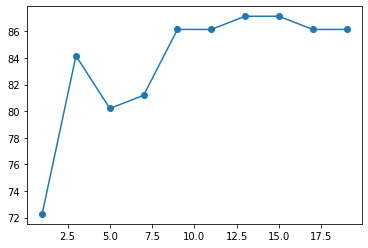

In [142]:
from sklearn.neighbors import KNeighborsClassifier as KNN
def knn(n):
    model = KNN(n_neighbors=n).fit(x_train, y_train)
    y_pred = model.predict(x_test)

    return accuracy_score(y_test, y_pred) * 100
acc = [knn(n) for n in range(1, 21, 2)]
plt.plot(range(1, 21, 2), acc, "o-")

mn = np.argmax(acc)
print(mn, acc[mn])

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy*100}')


Random Forest Accuracy: 85.14851485148515


In [131]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)

gbm.fit(x_train, y_train)
y_pred = gbm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'GBM Accuracy: {accuracy*100}')

GBM Accuracy: 82.17821782178217


In [144]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy*100}')

Logistic Regression Accuracy: 88.11881188118812


In [145]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy*100}')

Naive Bayes Accuracy: 81.1881188118812
